<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Twitter Data</h1>

<hr>


### ☑️ Objectives
At the end of this session, you will be able to:
- [ ] Understand how to find and run pre-trained models
- [ ] Evaluate results from pre-trained models
- [ ] Run a pre-trained model using real twitter data


### 🔨 Pre-Assignment

Create a new Conda environment for sentiment anaylsis (sa)

```bash
  conda create -n sa python=3.8 jupyter -y
```

Activate your new environment
```bash
  conda activate sa
```

Open the jupyter-notebook
```bash
  jupyter-notebook
```

Navigate through the repo in the notebook to find `imports.ipynb` for this week and open it.

Run all of the cells in the notebook.


### Background
Please review the weekly narrative [here](https://www.notion.so/Week-2-Data-Centric-AI-the-AI-Product-Lifecycle-72a84c1517b44fcbb3e6bd11d47477dc#2b73937612bb46559f5b91dc2bf55e7d)




<hr>

## 🚀 Let's Get Started

Let's first start with our imports

In [20]:
import csv # Allows us to read and write csv files
from pprint import pprint # Make our print functions easier to read

from transformers import pipeline # Hugging face pipeline to load online models

import numpy as np
import pandas as pd # this library needed to be added to the sa venv
import matplotlib.pyplot as plt # this library needed to be added to the sa venv

🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:
- 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.

- 🖼️ Images, for tasks like image classification, object detection, and segmentation.
- 🗣️ Audio, for tasks like speech recognition and audio classification.

This is the pipeline method in transformers that we'll be using to analyze our sentiment data. Since we're not specifying a pretrained model, the pipeline has a default sentiment analysis model called [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).

In [21]:
# Grab default SA model: distilbert-base-uncased-finetuned-sst-2-english
# Note: This is what a specified model call looks like:
# bertweet_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Quick facts on the  model
Source: https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english
- License: Apache-2.0
- Language(s): English
- "for sentences like This film was filmed in COUNTRY, this binary classification model will give radically different probabilities for the positive label depending on the country (0.89 if the country is France, but 0.08 if the country is Afghanistan)"
- Training Data: The authors use the following Stanford Sentiment Treebank(sst2) corpora for the model.
- "binary classification model": so the classes are just negative or positive


In this example, we'll supply two polar sentiments and test out the model pipeline.

In [22]:
data = ["This is great!", "Oh no!"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.994263231754303}]

The `label` in this case indicates the prediction for the sentiment type.

The `score` indicates the confidence of the prediction (between 0 and 1).

Since our sentiments were very polar, it was easier for the model to predict the sentiment type.

Let's see what happens when we use a less clear example:

In [23]:
challenging_sentiments = ["I don't think freddriq should leave, he's been helpful.",
                          "Is that the lake we went to last month?",
                          "Redrum! Redrum!",
                          'I dunno. Maybe.', 
                          'I dunno. Maybe!',
                          "You'll never catch me, I'm the gingerbread man!",
                          "I am happy."]
sentiment_pipeline(challenging_sentiments)

[{'label': 'NEGATIVE', 'score': 0.9955562949180603},
 {'label': 'NEGATIVE', 'score': 0.9860844016075134},
 {'label': 'NEGATIVE', 'score': 0.930412769317627},
 {'label': 'NEGATIVE', 'score': 0.9941014647483826},
 {'label': 'NEGATIVE', 'score': 0.9608270525932312},
 {'label': 'NEGATIVE', 'score': 0.9995751976966858},
 {'label': 'POSITIVE', 'score': 0.9998760223388672}]

<hr>

### Loading the Twitter Data

Let's play with some twitter data. We'll be using a modified version of the [Elon Musk twitter dataset on Kaggle](https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets).

In [24]:
with open('../data/elonmusk_tweets.csv', newline='', encoding='utf8') as f:
    tweets=[]
    reader = csv.reader(f)
    twitter_data = list(reader)
    for tweet in twitter_data:
        tweets.append(tweet[0])

pprint(tweets[:100])

['@vincent13031925 For now. Costs are decreasing rapidly.',
 'Love this beautiful shot',
 '@agnostoxxx @CathieDWood @ARKInvest Trust the shrub',
 'The art In Cyberpunk is incredible',
 '@itsALLrisky 🤣🤣',
 '@seinfeldguru @WholeMarsBlog Nope haha',
 '@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will '
 'soon guess based on time of day, taking you home or to work or to what’s on '
 'your calendar',
 '@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many '
 'missions',
 'Blimps rock  https://t.co/e8cu5FkNOI',
 '@engineers_feed Due to lower gravity, you can travel from surface of Mars to '
 'surface of Earth fairly easily with a single stage rocket. Earth to Mars is '
 'vastly harder.',
 '@DrPhiltill Good thread',
 '@alexellisuk Pretty much',
 '@tesla_adri @WholeMarsBlog These things are best thought of as '
 'probabilities. There are 5 forward-facing cameras. It is highly likely that '
 'at least one of them will see multiple cars ahead.',
 '@WholeMa

First things first - let's look at the sentiment as determined by the [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) (default model) in the pipeline.

In [25]:
distil_sentiment = sentiment_pipeline(tweets[0:100])

In [26]:
# Inspect some tweets with thier respective labels
[ ( tweets[i] , distil_sentiment[i]['label'] , distil_sentiment[i]['score'] ) 
    for i in np.arange(15)]

[('@vincent13031925 For now. Costs are decreasing rapidly.',
  'NEGATIVE',
  0.9963656663894653),
 ('Love this beautiful shot', 'POSITIVE', 0.9998824596405029),
 ('@agnostoxxx @CathieDWood @ARKInvest Trust the shrub',
  'NEGATIVE',
  0.8498326539993286),
 ('The art In Cyberpunk is incredible', 'POSITIVE', 0.9998857975006104),
 ('@itsALLrisky 🤣🤣', 'NEGATIVE', 0.9839497804641724),
 ('@seinfeldguru @WholeMarsBlog Nope haha', 'NEGATIVE', 0.9933285713195801),
 ('@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will soon guess based on time of day, taking you home or to work or to what’s on your calendar',
  'NEGATIVE',
  0.9917682409286499),
 ('@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many missions',
  'POSITIVE',
  0.9983181953430176),
 ('Blimps rock  https://t.co/e8cu5FkNOI', 'NEGATIVE', 0.9937851428985596),
 ('@engineers_feed Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. 

Let's check out the distribution of positive/negative Tweets and see the breakdown using Python's 🐍 standard library `collections.Counter`!

In [27]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in distil_sentiment])
pos_sent_count = tweet_distro['POSITIVE']
neg_sent_count = tweet_distro['NEGATIVE']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

49 (49.00%) of the tweets classified are positive.
51 (51.00%) of the tweets classified are negative.


Let's do that process again, but use a model with an additional potential label "NEUTRAL" called [bertweet-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

To start - we'll build a pipeline with the new model by using the 🤗 Hugging Face address: `finiteautomata/bertweet-base-sentiment-analysis`

In [28]:
bertweet_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Notes on finiteautomata/bertweet-base-sentiment-analysis
Source: https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis
- Sentiment Analysis in English
-  Model trained with SemEval 2017 corpus (around ~40k tweets). Base model is BERTweet, a RoBERTa model trained on English tweets.
- Uses POS, NEG, NEU labels.
- License: pysentimiento is an open-source library for non-commercial use and scientific research purposes only. Please be aware that models are trained with third-party datasets and are subject to their respective licenses.

In [29]:
# A quick look at the  challenge sentiments from above
challenging_sentiments = ["I don't think freddriq should leave, he's been helpful.",
                          "Is that the lake we went to last month?",
                          "Redrum! Redrum!",
                          'I dunno. Maybe.', 
                          'I dunno. Maybe!',
                          "You'll never catch me, I'm the gingerbread man!",
                          "I am happy."]
bertweet_challenge_sentiments = bertweet_pipeline(challenging_sentiments)

# This model isn't quite up to the task of unterstanding the sentiments of
# (i) people in The Shining and (ii) Gingerbread people
# Also, it seems like exclamation points are happy things.
[ (challenging_sentiments[i] , 
  bertweet_challenge_sentiments[i]['label'] , 
  bertweet_challenge_sentiments[i]['score'])
for i in np.arange(len(challenging_sentiments)) ]

[("I don't think freddriq should leave, he's been helpful.",
  'POS',
  0.8916740417480469),
 ('Is that the lake we went to last month?', 'NEU', 0.9496399164199829),
 ('Redrum! Redrum!', 'NEU', 0.9168683290481567),
 ('I dunno. Maybe.', 'NEU', 0.9309772849082947),
 ('I dunno. Maybe!', 'NEU', 0.7618988752365112),
 ("You'll never catch me, I'm the gingerbread man!",
  'NEU',
  0.4929681420326233),
 ('I am happy.', 'POS', 0.9911653399467468)]

Next, and the same as before, let's run the analysis on 100 of Elon's tweets.

In [30]:
bert_sentiment = bertweet_pipeline( tweets[0:100] )

In [31]:
# Inspect some tweets with thier respective labels
[ ( tweets[i] , bert_sentiment[i]['label'] , bert_sentiment[i]['score'] ) 
    for i in np.arange(15)]

[('@vincent13031925 For now. Costs are decreasing rapidly.',
  'NEU',
  0.9523929953575134),
 ('Love this beautiful shot', 'POS', 0.9909942746162415),
 ('@agnostoxxx @CathieDWood @ARKInvest Trust the shrub',
  'NEU',
  0.9733855128288269),
 ('The art In Cyberpunk is incredible', 'POS', 0.9824264049530029),
 ('@itsALLrisky 🤣🤣', 'NEG', 0.9627320766448975),
 ('@seinfeldguru @WholeMarsBlog Nope haha', 'NEU', 0.8657805323600769),
 ('@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will soon guess based on time of day, taking you home or to work or to what’s on your calendar',
  'NEU',
  0.9263535141944885),
 ('@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many missions',
  'NEU',
  0.7412322163581848),
 ('Blimps rock  https://t.co/e8cu5FkNOI', 'POS', 0.6090267896652222),
 ('@engineers_feed Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. Earth to Mars is vastly harder.',
  'NEU',
  

And then, let's check out the breakdown of positive, negative, AND neutral sentiments!

In [32]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in bert_sentiment])
pos_sent_count = tweet_distro['POS']
neu_sent_count = tweet_distro['NEU']
neg_sent_count = tweet_distro['NEG']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neu_sent_count} ({neu_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are neutral.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

29 (29.00%) of the tweets classified are positive.
64 (64.00%) of the tweets classified are neutral.
7 (7.00%) of the tweets classified are negative.


dataframe comparing results


,distil_sentiment,distil_score,bert_sentiment,bert_score,tweet
0,NEGATIVE,0.996366,NEU,0.952393,@vincent13031925 For now. Costs are decreasing...
1,POSITIVE,0.999882,POS,0.990994,Love this beautiful shot
2,NEGATIVE,0.849833,NEU,0.973386,@agnostoxxx @CathieDWood @ARKInvest Trust the ...
3,POSITIVE,0.999886,POS,0.982426,The art In Cyberpunk is incredible
4,NEGATIVE,0.983950,NEG,0.962732,@itsALLrisky 🤣🤣
...,...,...,...,...,...
95,POSITIVE,0.997999,NEU,0.902168,@allrocketsboi True
96,NEGATIVE,0.992092,NEG,0.960584,@GerberKawasaki I fried a lot of neurons on th...
97,NEGATIVE,0.998769,NEU,0.768268,Me in my sick new car (left him the money) ht...
98,NEGATIVE,0.995760,NEU,0.913114,"@TrungTPhan Had no money to invest in Zip2, bu..."


Counter({('NEGATIVE', 'NEU'): 40,
         ('POSITIVE', 'POS'): 24,
         ('NEGATIVE', 'NEG'): 6,
         ('POSITIVE', 'NEU'): 24,
         ('NEGATIVE', 'POS'): 5,
         ('POSITIVE', 'NEG'): 1})


One case of converting positive to negative. The score wasn't super low.


,distil_sentiment,distil_score,bert_sentiment,bert_score,tweet
19,POSITIVE,0.621601,NEG,0.763041,Kong vs Godzilla has record for most meth ever...


Text(0, 0.5, 'bert_score')

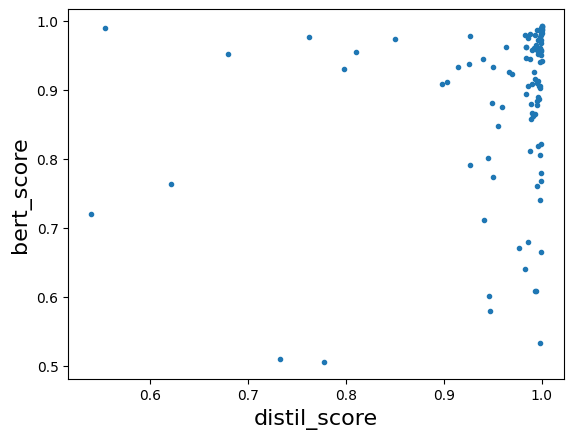

In [33]:
# Create dataframe comparing results (they're dicts, so in the future, just create a dataframe directly.)
df_class_comparison = pd.DataFrame( 
                data = {'distil_sentiment': [x['label'] for x in distil_sentiment] ,
                        'distil_score':     [x['score'] for x in distil_sentiment] ,
                        'bert_sentiment' :  [x['label'] for x in bert_sentiment] , 
                        'bert_score' :      [x['score'] for x in bert_sentiment] , 
                        'tweet': tweets[0:100]
                        } )

print('dataframe comparing results')
display(df_class_comparison)

print('\n')
display(Counter(list(df_class_comparison[['distil_sentiment','bert_sentiment']
                         ].itertuples(index=False, name=None))))

print("\nOne case of converting positive to negative. The score wasn't super low.")
display(df_class_comparison[(df_class_comparison.distil_sentiment == 'POSITIVE') &
(df_class_comparison.bert_sentiment == 'NEG') ])

# This plot would be more useful in somethng like seaborn with 6 categories for the
# different sentiment classification combos.
plt.plot(df_class_comparison.distil_score , df_class_comparison.bert_score , '.' )
plt.xlabel('distil_score' , fontsize=16 )
plt.ylabel('bert_score' , fontsize = 16)

❓ What do you notice about the difference in the results? 


Model 1: distilbert-base-uncased-finetuned-sst-2-english
- 49 (49.00%) of the tweets classified are positive.
- 51 (51.00%) of the tweets classified are negative.

Model 2: bertweet-sentiment-analysis
- 29 (29.00%) of the tweets classified are positive.
- 64 (64.00%) of the tweets classified are neutral.
- 7 (7.00%) of the tweets classified are negative.

Between the models' 100 predictions
- 70 tweets changed class
- 30 stayed the same

Conversion Rate:
- ('NEGATIVE', 'NEU'): 40,
- ('POSITIVE', 'POS'): 24,*
- ('NEGATIVE', 'NEG'): 6,*
- ('POSITIVE', 'NEU'): 24,
- ('NEGATIVE', 'POS'): 5,
- ('POSITIVE', 'NEG'): 1

(*) = No change.

From this, it looks like neutral tweets disproportiately took from the negative-classed tweets:
- 40 from Negative to Neutral. Only 6 stayed negative.
- 24 from Positive to Neutral. Whereas 24 stayed positive.
- 5 negative became positive & 1 positive became negative.

It's interesting that by adding the Neutral class it didn't just help move edge cases (with low confidence) into the third category but actually helped reclassify some tweets (from Negative to positive & vice versa) that were confidently wrong.

❓ Do the results for the `bertweet-base` model look better, or worse, than the results for the `distilbert-base` model? Why?

By spot checking the tweets in df_class_comparison (re-displayed below) and the challenge tweets, it's pretty clear that `distilbert-base` tends to over-assign the negative class. Furthmore, its to be confident in its false negative classifications.
For example, the following tweet should probably be considered neutral or (in my opinion) positive:

'@vincent13031925 For now. Costs are decreasing rapidly.'

But distilbert-base` classifies it NEGATIVE	with high confidence 0.996366.

Maybe this is because words like "cost" and "decreasing" are negative. (Even though putting them together isn't.)
Alternatively, the short sentences are like a "terse" sentiment.
More likely though, it's just the fact that the model output is restricted to 2 classes which poorly emulates a lot sentiment categories. So a negative classification could possibly just mean "not positive". Given the much lower rate that `distilbert-base`'s positives became neutrals or negatives (when classified by bertweet), it seems that this is much more of a challenge for the negative class.

A final critique of the `distilbert-base` model is that it's not just wrong on many negatives, but that it's *confidently* wrong. You would hope that misclassified negative tweets would have a low confidence score but this is not the case. `distilbert-base` is frequently wrong and confident. Here are some examples where `distilbert-base` is highly confident that this is a negative tweet (assuming there's not a lot of missing context):
- @itsALLrisky 🤣🤣
- '@WholeMarsBlog When radar and vision disagree, which one do you believe? Vision has much more precision, so better to double down on vision than do sensor fusion.'
- Where is Shrek 5!? 
- 'A monkey is literally playing a video game telepathically using a brain chip!!'
- 'First @Neuralink product will enable someone with paralysis to use a smartphone with their mind faster than someone using thumbs'

Here's an example with an incorrect negative classification that *is* uncertain.

- '@cleantechnica Congrats to NIO. That is a tough milestone.'

So in total (in the majority of cases) it seems like I'd prefer `bertweet-base` for the following reasons:

[1] it isn't relegated to binary classification. Binary classification is a poor desctibtion of the range of possible sentiments.

[2] It *appears* to over-classify as negative.

[3] When it's wrong, it's frequently confident.

In [34]:
display(df_class_comparison[df_class_comparison.distil_sentiment == 'NEGATIVE' ])

,distil_sentiment,distil_score,bert_sentiment,bert_score,tweet
0,NEGATIVE,0.996366,NEU,0.952393,@vincent13031925 For now. Costs are decreasing...
2,NEGATIVE,0.849833,NEU,0.973386,@agnostoxxx @CathieDWood @ARKInvest Trust the ...
4,NEGATIVE,0.983950,NEG,0.962732,@itsALLrisky 🤣🤣
5,NEGATIVE,0.993329,NEU,0.865781,@seinfeldguru @WholeMarsBlog Nope haha
6,NEGATIVE,0.991768,NEU,0.926354,@WholeMarsBlog If you don’t say anything &amp;...
8,NEGATIVE,0.993785,POS,0.609027,Blimps rock https://t.co/e8cu5FkNOI
9,NEGATIVE,0.984098,NEU,0.945598,"@engineers_feed Due to lower gravity, you can ..."
12,NEGATIVE,0.914252,NEU,0.933398,@tesla_adri @WholeMarsBlog These things are be...
13,NEGATIVE,0.997803,NEU,0.905119,@WholeMarsBlog Sensors are a bitstream and cam...
14,NEGATIVE,0.994660,NEU,0.883727,"@WholeMarsBlog When radar and vision disagree,..."


<hr>

### Partner Exercise

With your partner, try and determine what the following tweets might be classified as. Try to classify them into the same groups as both of the model pipelines we saw today - and try adding a few of your own sentences/Tweets! 

In [35]:
example_difficult_tweets = [
    "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
    "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
    "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
    "Helloooo? Is anybody there?????",
    "Meow meow meow meow meow meow meow!",
    "Kong vs Godzilla has record for most cabbage ever consumed in a writer's room",
    "Kong vs Godzilla has record for most chuck roast ever consumed in a writer's room",
    'meth meth'

]



My predictions for `distilbert-base` model on these difficult tweets:
(Given what I've seen above, I'll tend to put Neutral tweets as negative for `distilbert-base`)

- POS    "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
- NEG    "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
- POS    "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
- NEG    "Helloooo? Is anybody there?????",
- POS    "Meow meow meow meow meow meow meow!",
- NEG    "Kong vs Godzilla has record for most cabbage ever consumed in a writer's room",
- NEG    "Kong vs Godzilla has record for most chuck roast ever consumed in a writer's room",
- NEG    'meth meth'


My predictions for `bert-tweet` model on these difficult tweets:

- NEU    "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
- NEU    "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
- NEU    "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
- NEU    "Helloooo? Is anybody there?????",
- NEU    "Meow meow meow meow meow meow meow!",
- NEU    "Kong vs Godzilla has record for most cabbage ever consumed in a writer's room",
- NEU    "Kong vs Godzilla has record for most chuck roast ever consumed in a writer's room",
- NEG    'meth meth'


The `distilbert-base` model:

In [36]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(sentiment_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'POSITIVE', 'score': 0.5429078936576843}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEGATIVE', 'score': 0.634838342666626}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'POSITIVE', 'score': 0.9419694542884827}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'NEGATIVE', 'score': 0.990475594997406}]
Helloooo? Is anybody there?????

[{'label': 'POSITIVE', 'score': 0.9993715882301331}]
Meow meow meow meow meow meow meow!

[{'label': 'NEGATIVE', 'score': 0.9670003056526184}]
Kong vs Godzilla has record for most cabbage ever consumed in a writer's room

[{'label': 'NEGATIVE', 'score': 0.8810136914253235}]
Kong vs Godzilla has record for most chuck roast

The `bertweet-base` model:

In [37]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(bertweet_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'NEG', 'score': 0.7213016152381897}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEU', 'score': 0.8023841977119446}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'NEU', 'score': 0.8843539953231812}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'NEU', 'score': 0.7695976495742798}]
Helloooo? Is anybody there?????

[{'label': 'POS', 'score': 0.6094029545783997}]
Meow meow meow meow meow meow meow!

[{'label': 'NEU', 'score': 0.8675671219825745}]
Kong vs Godzilla has record for most cabbage ever consumed in a writer's room

[{'label': 'NEU', 'score': 0.6997652053833008}]
Kong vs Godzilla has record for most chuck roast ever consumed in a writer's room

❓ How did you do? Did you find any surprising results? 

It seems like most of my predictions were right.
- I added a tweet of just cat sounds. It wasn't suprising that that one was positive since I assume that must people do animal sounds in happy tweets.
- I'm suprised that the added tweet about meth was classified as "positive" (distilbert) and "neutral" (bertweet). I would have thought that it would have trended towards negative.


❓ Are there any instances where the two models gave different predictions for the same tweet?

Yes there are 70 cases out of 100 where this happened. As outlined earlier.

The numbers were
Conversion Rate:
- ('NEGATIVE', 'NEU'): 40,
- ('POSITIVE', 'POS'): 24, *
- ('NEGATIVE', 'NEG'): 6, *
- ('POSITIVE', 'NEU'): 24,
- ('NEGATIVE', 'POS'): 5,
- ('POSITIVE', 'NEG'): 1

(*) = No change in class.

The differences twere mainly reclassifications to "Neurtral".
Negative classifications in distilbert we more likely to change class than possitive classes.

The full dataframe of different predictions for the same tweet is given in the next cell, along with a plot of the prediction's score.

In most cases, the model was still very confident in its prediction.

,distil_sentiment,distil_score,bert_sentiment,bert_score,tweet
0,NEGATIVE,0.996366,NEU,0.952393,@vincent13031925 For now. Costs are decreasing...
2,NEGATIVE,0.849833,NEU,0.973386,@agnostoxxx @CathieDWood @ARKInvest Trust the ...
5,NEGATIVE,0.993329,NEU,0.865781,@seinfeldguru @WholeMarsBlog Nope haha
6,NEGATIVE,0.991768,NEU,0.926354,@WholeMarsBlog If you don’t say anything &amp;...
7,POSITIVE,0.998318,NEU,0.741232,@DeltavPhotos @PortCanaveral That rocket is a ...
...,...,...,...,...,...
92,POSITIVE,0.987819,NEU,0.944323,Urgent need to build more housing in greater A...
93,POSITIVE,0.998774,NEU,0.972324,Austin++
95,POSITIVE,0.997999,NEU,0.902168,@allrocketsboi True
97,NEGATIVE,0.998769,NEU,0.768268,Me in my sick new car (left him the money) ht...


Text(0.5, 1.0, 'Certainty Scores for Classification Disagreement')

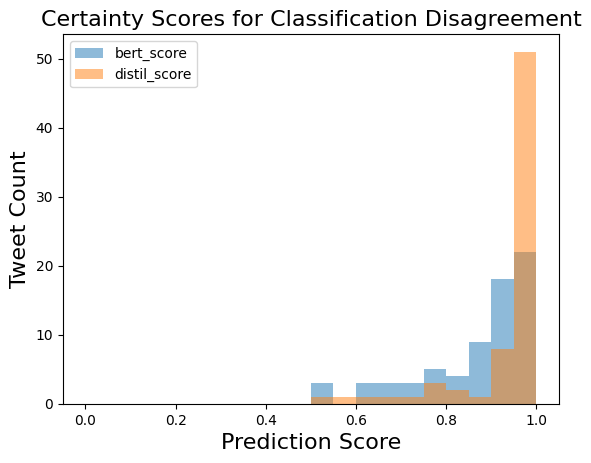

In [38]:
display(df_class_comparison[df_class_comparison.distil_sentiment.apply(lambda x: x[:3]) !=  
                            df_class_comparison.bert_sentiment ])

# Histogram of scores when classifications disagree.
# 'distil_sentiment' values are set to the first three characters to align format.

plt.hist( df_class_comparison[df_class_comparison.distil_sentiment.apply(lambda x: x[:3]) !=  
                            df_class_comparison.bert_sentiment ].bert_score , 
         np.arange(0,1.05 , .05) , alpha = .5 , label = 'bert_score' ) ; 

plt.hist( df_class_comparison[df_class_comparison.distil_sentiment.apply(lambda x: x[:3]) !=  
                            df_class_comparison.bert_sentiment ].distil_score , 
         np.arange(0,1.05 , .05) , alpha = .5 , label = 'distil_score' ) ; 

plt.legend()
plt.xlabel('Prediction Score' , fontsize=16)
plt.ylabel('Tweet Count' , fontsize=16)
plt.title('Certainty Scores for Classification Disagreement' , fontsize=16)
